<a href="https://colab.research.google.com/github/MachineLearnWithRosh/FunWithTensorflow/blob/master/Tensorflow%20Tutorial%20-%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
x_data = np.linspace(0.0,10.0,1000000)

noise = np.random.randn(len(x_data)) #this returns the samples of Standard Normal Distribution

In [0]:
#y = mx + c ; m=0.5, c=5
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data=x_data, columns=['X_data'])

y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [62]:
print(x_df.head(5))

print("="*45)

print(y_df.head(5))

    X_data
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004
          Y
0  4.710603
1  5.549861
2  4.185125
3  3.744980
4  4.579921


In [63]:
df=pd.concat([x_df,y_df],axis=1)

df.head(5)

,X_data,Y
0,0.00000,4.710603
1,0.00001,5.549861
2,0.00002,4.185125
3,0.00003,3.744980
4,0.00004,4.579921


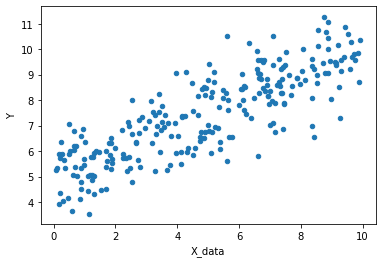

In [64]:
df.sample(n=250).plot(kind="scatter",x="X_data",y="Y")

In [0]:
batch_size=8

In [0]:
m=tf.Variable(0.5)
b=tf.Variable(1.0)

In [0]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [0]:
#model
y_model = m*xph + b

In [0]:
#Cost Function
error = tf.reduce_sum(tf.square(y_model-yph))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)  

In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)

  batches=10

  for i in range(batches):
    rand_int=np.random.randint(len(x_data),size=batch_size)
    feed={xph:x_data[rand_int], yph:y_true[rand_int]}
    sess.run(train, feed_dict=feed)
  model_m,model_b = sess.run([m,b])


In [88]:
model_b

1.2672727

In [89]:
model_m

1.0444959

In [0]:
y_hat = model_m*x_data + model_m

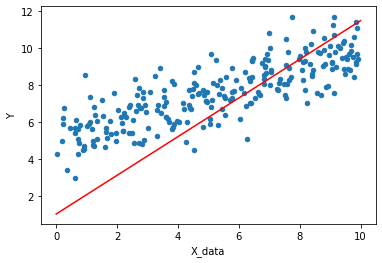

In [91]:
df.sample(n=250).plot(kind="scatter",x="X_data",y="Y")
plt.plot(x_data,y_hat,'r')

In [0]:
#Estimator API

feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [0]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)